In [12]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sw_plotting import change_bar_width, plotCountBar
from sw_utilities import tukeyTest, getCountDFbyPrefix, get_annotated_countDF

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.ERROR)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [13]:
# Read in the count data by Kaz

datasetPrefix = '20220513-plateI-day0'
datasetFolder = '../data/220509-30-for-bud-count-Kaz/sg-Itgb1-E16-blast/'
df = getCountDFbyPrefix(datasetPrefix, datasetFolder)

# - For Itgb1 KO
# - Plate I, by Shaohe, add blasticidin
# - D2-D6, LV-188
# - D7-D11, LV-401
# - E2-E6, LV-402
# - E7-E11, LV-403

groups = ["sg-Control"]*5 + ["sg1-Itgb1"]*5 + ["sg2-Itgb1"]*5 + ["sg3-Itgb1"]*5
df["groups"] = groups

# This is day 0
df.rename(columns={'counts': 'counts_d0'}, inplace=True)

df0 = df

In [14]:
# Read in the count data by Kaz

datasetPrefix = '20220517-plateI-day4'
datasetFolder = '../data/220509-30-for-bud-count-Kaz/sg-Itgb1-E16-blast/'
df = getCountDFbyPrefix(datasetPrefix, datasetFolder)

# - For Itgb1 KO
# - Plate I, by Shaohe, add blasticidin
# - D2-D6, LV-188
# - D7-D11, LV-401
# - E2-E6, LV-402
# - E7-E11, LV-403

groups = ["sg-Control"]*5 + ["sg1-Itgb1"]*5 + ["sg2-Itgb1"]*5 + ["sg3-Itgb1"]*5
df["groups"] = groups

# This is day 4
df.rename(columns={'counts': 'counts_d4'}, inplace=True)

df4 = df

Summary of test:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
sg-Control sg1-Itgb1  -2.2255 0.0076  -3.899 -0.5519   True
sg-Control sg2-Itgb1  -2.9836  0.001 -4.6572 -1.3101   True
sg-Control sg3-Itgb1  -2.6088  0.002 -4.2823 -0.9353   True
 sg1-Itgb1 sg2-Itgb1  -0.7582 0.5719 -2.4317  0.9154  False
 sg1-Itgb1 sg3-Itgb1  -0.3833    0.9 -2.0569  1.2902  False
 sg2-Itgb1 sg3-Itgb1   0.3748    0.9 -1.2987  2.0484  False
-----------------------------------------------------------
p values of all pair-wise tests:
 [0.00762699 0.001      0.00201628 0.5719299  0.9        0.9       ]


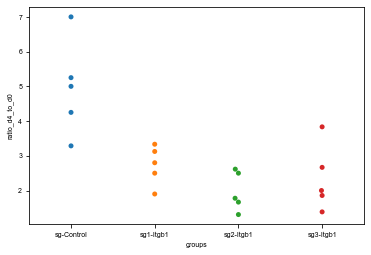

In [17]:
df = df0.merge(df4, on=['file_name', 'groups'])
df['ratio_d4_to_d0'] = df['counts_d4'] / df['counts_d0']

# Inspect raw data if curious about how they look
ax = sns.swarmplot(df.groups, df.ratio_d4_to_d0)

# Perform a Tukey test across groups
tukeyTest(df.ratio_d4_to_d0, df.groups)

# Use different variables to hold counting data by Kaz or Rei
df_Kaz = df

In [18]:
# Read in the count data by Rei

datasetPrefix = '20220513-plateI-day0'
datasetFolder = '../data/220509-30-for-bud-count-Rei/sg-Itgb1-E16-blast/'
df = getCountDFbyPrefix(datasetPrefix, datasetFolder)

# - For Itgb1 KO
# - Plate C, mouse 1, by Shaohe
# - D2-D6, LV-188
# - D7-D11, LV-401
# - E2-E6, LV-402
# - E7-E11, LV-403

groups = ["sg-Control"]*5 + ["sg1-Itgb1"]*5 + ["sg2-Itgb1"]*5 + ["sg3-Itgb1"]*5
df["groups"] = groups

# This is day 0
df.rename(columns={'counts': 'counts_d0'}, inplace=True)

df0 = df

In [19]:
# Read in the count data by Rei

datasetPrefix = '20220517-plateI-day4'
datasetFolder = '../data/220509-30-for-bud-count-Rei/sg-Itgb1-E16-blast/'
df = getCountDFbyPrefix(datasetPrefix, datasetFolder)

# - For Itgb1 KO
# - Plate C, mouse 1, by Shaohe
# - D2-D6, LV-188
# - D7-D11, LV-401
# - E2-E6, LV-402
# - E7-E11, LV-403

groups = ["sg-Control"]*5 + ["sg1-Itgb1"]*5 + ["sg2-Itgb1"]*5 + ["sg3-Itgb1"]*5
df["groups"] = groups

# This is day 4
df.rename(columns={'counts': 'counts_d4'}, inplace=True)

df4 = df

Summary of test:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2  meandiff p-adj   lower    upper  reject
------------------------------------------------------------
sg-Control sg1-Itgb1  -5.6765 0.0508 -11.3685  0.0155  False
sg-Control sg2-Itgb1  -7.0152 0.0134 -12.7073 -1.3232   True
sg-Control sg3-Itgb1  -7.3127 0.0099 -13.0048 -1.6207   True
 sg1-Itgb1 sg2-Itgb1  -1.3387    0.9  -7.0308  4.3533  False
 sg1-Itgb1 sg3-Itgb1  -1.6362 0.8273  -7.3282  4.0558  False
 sg2-Itgb1 sg3-Itgb1  -0.2975    0.9  -5.9895  5.3945  False
------------------------------------------------------------
p values of all pair-wise tests:
 [0.05075264 0.01341764 0.00991211 0.9        0.82726046 0.9       ]


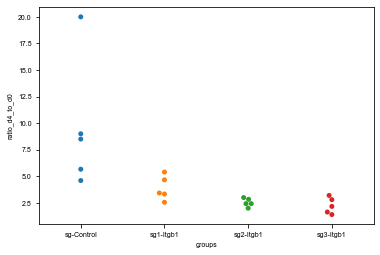

In [20]:
df = df0.merge(df4, on=['file_name', 'groups'])
df['ratio_d4_to_d0'] = df['counts_d4'] / df['counts_d0']

# Inspect raw data if curious about how they look
ax = sns.swarmplot(df.groups, df.ratio_d4_to_d0)

# Perform a Tukey test across groups
tukeyTest(df.ratio_d4_to_d0, df.groups)

# Use different variables to hold counting data by Kaz or Rei
df_Rei = df

In [21]:
# Merge the two data set and compare the countings of Rei and Kaz
df_Kaz.rename(columns={'counts_d0': 'counts_d0_Kaz'}, inplace=True)
df_Kaz.rename(columns={'counts_d4': 'counts_d4_Kaz'}, inplace=True)
df_Kaz.rename(columns={'ratio_d4_to_d0': 'ratio_d4_to_d0_Kaz'}, inplace=True)

df_Rei.rename(columns={'counts_d0': 'counts_d0_Rei'}, inplace=True)
df_Rei.rename(columns={'counts_d4': 'counts_d4_Rei'}, inplace=True)
df_Rei.rename(columns={'ratio_d4_to_d0': 'ratio_d4_to_d0_Rei'}, inplace=True)

df = df_Kaz.merge(df_Rei, on=['file_name', 'groups'])
df.head()

,file_name,scrambled_file_name_x_x,counts_d0_Kaz,groups,scrambled_file_name_y_x,counts_d4_Kaz,ratio_d4_to_d0_Kaz,scrambled_file_name_x_y,counts_d0_Rei,scrambled_file_name_y_y,counts_d4_Rei,ratio_d4_to_d0_Rei
0,Plate07152021_WellD02_ChannelMono_Seq0000.nd2,346f30cabbdda2ab706a80f5d3d12407.nd2,3,sg-Control,069261f8006cfcbb20320bdff2aba1ec.nd2,21,7.000000,346f30cabbdda2ab706a80f5d3d12407.nd2,1,069261f8006cfcbb20320bdff2aba1ec.nd2,20,20.000000
1,Plate07152021_WellD03_ChannelMono_Seq0001.nd2,1475877d3d7146aaf4789f735c1e504d.nd2,4,sg-Control,268f675ba180336022880af8c7629f3b.nd2,21,5.250000,1475877d3d7146aaf4789f735c1e504d.nd2,3,268f675ba180336022880af8c7629f3b.nd2,17,5.666667
2,Plate07152021_WellD04_ChannelMono_Seq0002.nd2,227a5cc1e88ac7380136473bf9f6b8df.nd2,7,sg-Control,c90ce29d4ecf6d98ba9d47b329548fb5.nd2,35,5.000000,227a5cc1e88ac7380136473bf9f6b8df.nd2,4,c90ce29d4ecf6d98ba9d47b329548fb5.nd2,34,8.500000
3,Plate07152021_WellD05_ChannelMono_Seq0003.nd2,284ced130d0cf9ff3537a14be689072b.nd2,4,sg-Control,47cfb993d1e26d3aec78875faf1fa2f3.nd2,17,4.250000,284ced130d0cf9ff3537a14be689072b.nd2,2,47cfb993d1e26d3aec78875faf1fa2f3.nd2,18,9.000000
4,Plate07152021_WellD06_ChannelMono_Seq0004.nd2,d55b016654394aed8fb7d54ed8e35cec.nd2,7,sg-Control,197e829b537eb7c76f67b7bb70e0d347.nd2,23,3.285714,d55b016654394aed8fb7d54ed8e35cec.nd2,5,197e829b537eb7c76f67b7bb70e0d347.nd2,23,4.600000


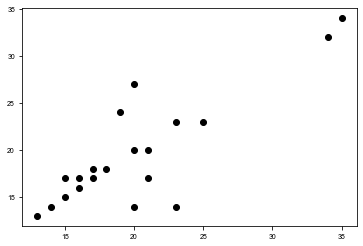

In [22]:
# plt.plot(df.ratio_d4_to_d0_Kaz, df.ratio_d4_to_d0_Rei, 'ok')
plt.plot(df.counts_d4_Kaz, df.counts_d4_Rei, 'ok')

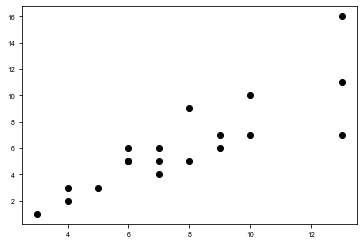

In [23]:
# plt.plot(df.ratio_d4_to_d0_Kaz, df.ratio_d4_to_d0_Rei, 'ok')
plt.plot(df.counts_d0_Kaz, df.counts_d0_Rei, 'ok')

In [24]:
df['counts_d0'] = (df['counts_d0_Rei'] + df['counts_d0_Kaz']) / 2
df['counts_d4'] = (df['counts_d4_Rei'] + df['counts_d4_Kaz']) / 2
df['ratio_d4_to_d0'] = df['counts_d4'] / df['counts_d0']

Summary of test:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
sg-Control sg1-Itgb1  -3.1633 0.0066 -5.4997 -0.8268   True
sg-Control sg2-Itgb1  -4.1438  0.001 -6.4803 -1.8073   True
sg-Control sg3-Itgb1   -4.029  0.001 -6.3655 -1.6926   True
 sg1-Itgb1 sg2-Itgb1  -0.9805 0.6234  -3.317  1.3559  False
 sg1-Itgb1 sg3-Itgb1  -0.8658 0.6991 -3.2023  1.4707  False
 sg2-Itgb1 sg3-Itgb1   0.1148    0.9 -2.2217  2.4512  False
-----------------------------------------------------------
p values of all pair-wise tests:
 [0.00662687 0.001      0.001      0.62338528 0.69912088 0.9       ]


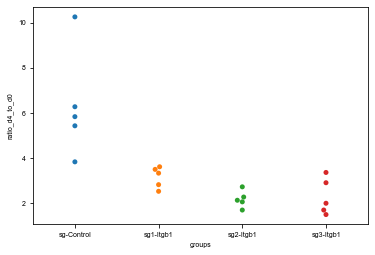

In [25]:
# Inspect raw data if curious about how they look
ax = sns.swarmplot(df.groups, df.ratio_d4_to_d0)

# Perform a Tukey test across groups
tukeyTest(df.ratio_d4_to_d0, df.groups)


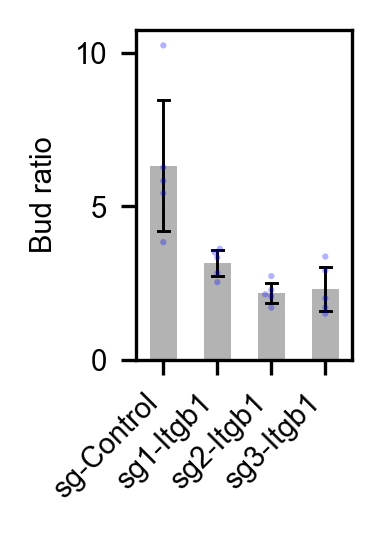

In [31]:
# Make plot for figure

fig_width, fig_height = 1.2, 2.0 # inches

line_width = .8
output_prefix = '220517-plateI-E16-d4-d0-ratio-Itgb1'
outputFigPath = '../jupyter_figures/' + output_prefix + '.svg'
# outputFigPath = '../jupyter_figures/' + output_prefix + '.tif'

fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
# ax = fig.add_axes([0.28, 0.35, 0.67, 0.6])
ax = fig.add_axes([0.35, 0.4, 0.6, 0.55])

# palette_dict = {'sg-Control': 'black', 'sg1-Itgb1': 'blue', 'sg2-Itgb1': 'red'}

sns.swarmplot(data = df,
              x = 'groups', y = 'ratio_d4_to_d0',
              color = 'blue',
              alpha = 0.3,
              size = 1.5
             )
sns.barplot(data = df,
            x = 'groups', y = 'ratio_d4_to_d0',
            ci = 'sd',
            color=".7", # This a nicer looking lighter gray to my own taste
            errwidth=.7, errcolor="k", capsize=.2)

change_bar_width(ax, .5)

# rotate x tick labels if necessary
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

ax.set_yticks([0,5,10])

plt.xlabel("")
plt.ylabel("Bud ratio")

# ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)